In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
df=pd.read_csv("fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [ ]:
df.isna().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [ ]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


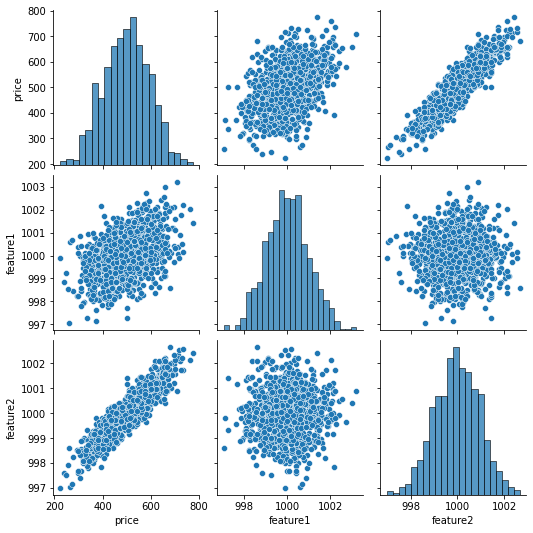

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr().style.background_gradient()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


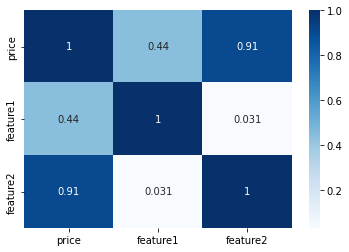

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [ ]:
df.corr()['price'].sort_values()

feature1    0.444190
feature2    0.907576
price       1.000000
Name: price, dtype: float64

In [ ]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
ann=Sequential()

ann.add(Dense(units=4, activation="relu"))
ann.add(Dense(units=4, activation="relu"))
ann.add(Dense(units=4, activation="relu"))
ann.add(Dense(units=1))



ann.compile(optimizer="rmsprop",loss='mse')


In [ ]:
ann.fit(xtrain,ytrain,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 255804.9844
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 255638.7031
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 255492.5000
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255340.0625
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255182.2656
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255023.3594
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 254860.0469
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254682.5312
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254487.4219
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254275.1094
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254041.7344
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [ ]:
loss=pd.DataFrame(ann.history.history)
loss.head()

,loss
0,255804.984375
1,255638.703125
2,255492.500000
3,255340.062500
4,255182.265625


In [ ]:
loss.tail()

,loss
245,30.573334
246,30.386539
247,30.230206
248,29.900305
249,29.714813


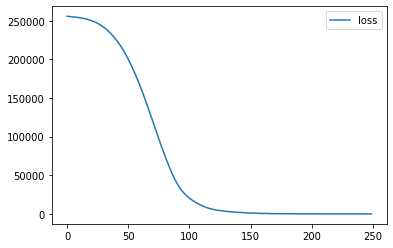

In [ ]:
loss.plot()

In [ ]:
ann.evaluate(xtrain,ytrain)

22/22 [==============================] - 0s 993us/step - loss: 29.1053


29.105323791503906

In [ ]:
ann.evaluate(xtest,ytest)

10/10 [==============================] - 0s 2ms/step - loss: 34.6950


34.694976806640625

In [ ]:
ypred=ann.predict(xtest)

In [ ]:
dic = {"Actual Y":ytest, "Predicted Y":ypred.flatten()}
df1=pd.DataFrame(dic)

In [ ]:
df1.head()

,Actual Y,Predicted Y
0,489.057552,481.422791
1,526.210746,526.513611
2,518.360395,501.806091
3,552.778935,541.379333
4,649.395917,650.674133


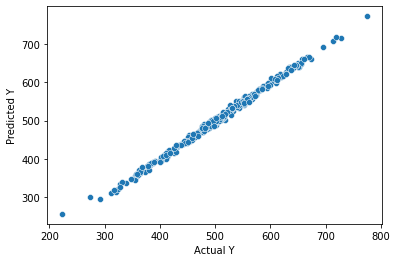

In [ ]:
sns.scatterplot(x="Actual Y",y="Predicted Y", data=df1)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print(f"MSE : {mean_squared_error(ytest,ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest,ypred))}")


MSE : 34.6949908396399
RMSE : 5.890245397234303


In [ ]:
newdata=[[800,850]]
 
newdata=sc.transform(newdata)

ann.predict(newdata)

array([[6594.1426]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
ann.save("ANN_fake")

INFO:tensorflow:Assets written to: ANN_fake/assets


In [ ]:
fr=load_model("ANN_fake")

In [ ]:
fr.predict(newdata)

array([[6594.1426]], dtype=float32)